# Logistic regression model using title data vectorized with word2Vec

In [41]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [42]:
#import data

%store -r x_title_train_wv_2d
%store -r x_title_test_wv_2d
%store -r y_title_train_wv
%store -r y_title_test_wv

In [43]:
#rename variables for ease of use

x_train =  x_title_train_wv_2d
x_test =  x_title_test_wv_2d
y_train = y_title_train_wv
y_test = y_title_test_wv

In [44]:
#define model

lr = LogisticRegression()

In [45]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [46]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [47]:
#cross validate on training set to check model stability

cv_scores_w2v_title_lr = cross_validate(lr, x_train, y_train, cv = k_folds, scoring=scorer)

In [48]:
#check cross validation scores 

cv_scores_w2v_title_lr

{'fit_time': array([0.82080364, 0.66622233, 0.853719  , 0.60737753, 0.66422296]),
 'score_time': array([0.03989291, 0.04188561, 0.03889537, 0.03091741, 0.04089189]),
 'test_accuracy': array([0.81959014, 0.82703098, 0.81505429, 0.81615225, 0.81810418]),
 'test_precision': array([0.80843237, 0.81747405, 0.80786026, 0.80615993, 0.80309101]),
 'test_recall': array([0.78081443, 0.78314917, 0.76425227, 0.77653783, 0.77750069]),
 'test_f1_score': array([0.79438343, 0.79994357, 0.78545146, 0.79107168, 0.79008869])}

In [49]:
#fit model on the whole training set
start = process_time()

lr.fit(x_train, y_train)

end=process_time()

In [50]:
#test model on test set

y_pred = lr.predict(x_test)

In [51]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84     10131
           1       0.77      0.81      0.79      7436

    accuracy                           0.82     17567
   macro avg       0.81      0.82      0.81     17567
weighted avg       0.82      0.82      0.82     17567



In [52]:
#create confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Logistic Regression model with Title Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

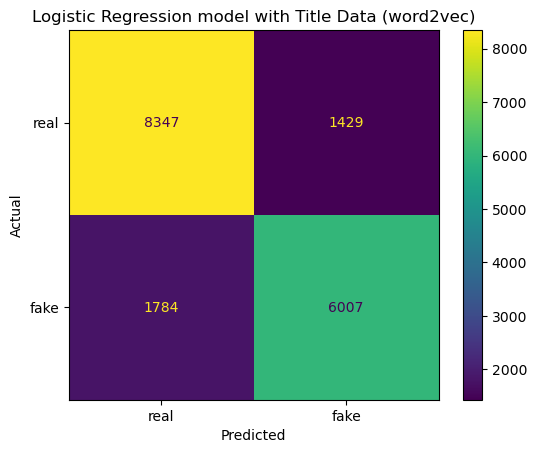

In [53]:
#plot confusion matrix

cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Logistic Regression model with Title Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [54]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [55]:
dict = {'data type': 'title',
        'model type':'logistic regression',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [56]:
w2v_title_lr=pd.DataFrame.from_dict([dict])

In [57]:
w2v_title_lr

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,logistic regression,word2vec,0.8171,0.807827,0.771018,0.788993,3.453125


In [58]:
#save results for later use

%store w2v_title_lr

Stored 'w2v_title_lr' (DataFrame)
